# Librerias

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler


## Análisis exploratorio de datos

### Paso 1: Planteamiento del problema y recopilación de datos

Importaremos el conjunto de datos para comenzar a trabajar con él:

In [51]:
url = "https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv"

In [52]:
total_data = pd.read_csv(url, sep=",")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


### Paso 2: Exploración y limpieza de datos

In [53]:
# Obtener las dimensiones
total_data.shape

(3140, 108)

In [54]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [55]:
# Eliminar duplicados
total_data.duplicated().sum()

np.int64(0)

In [56]:
total_data = total_data.drop_duplicates().reset_index(drop=True)
print(total_data.shape)
total_data.head()


(3140, 108)


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [57]:
total_data.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [58]:
total_data.columns.tolist()

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

In [59]:
## Eliminar información irrelevante

col_a_utilizar = [
    'Obesity_prevalence', 'MEDHHINC_2018', 'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'Unemployment_rate_2018', 'PCTPOVALL_2018',
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)']


total_data = total_data[col_a_utilizar]
total_data.head()

,Obesity_prevalence,MEDHHINC_2018,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,PCTPOVALL_2018,Active Primary Care Physicians per 100000 Population 2018 (AAMC)
0,35.8,59338,27.7,3.6,13.8,77.2
1,29.7,57588,31.3,3.6,9.8,77.2
2,40.7,34382,12.2,5.2,30.9,77.2
3,38.7,46064,11.5,4.0,21.8,77.2
4,34.0,50412,12.6,3.5,13.2,77.2


Paso 3: Análisis de variables

In [60]:
# Análisis de correlaciones

corr_matrix = total_data[col_a_utilizar].corr()
print(corr_matrix['Obesity_prevalence'].sort_values(ascending=False))

Obesity_prevalence                                                  1.000000
PCTPOVALL_2018                                                      0.537471
Unemployment_rate_2018                                              0.317041
Active Primary Care Physicians per 100000 Population 2018 (AAMC)   -0.381428
MEDHHINC_2018                                                      -0.598189
Percent of adults with a bachelor's degree or higher 2014-18       -0.696026
Name: Obesity_prevalence, dtype: float64


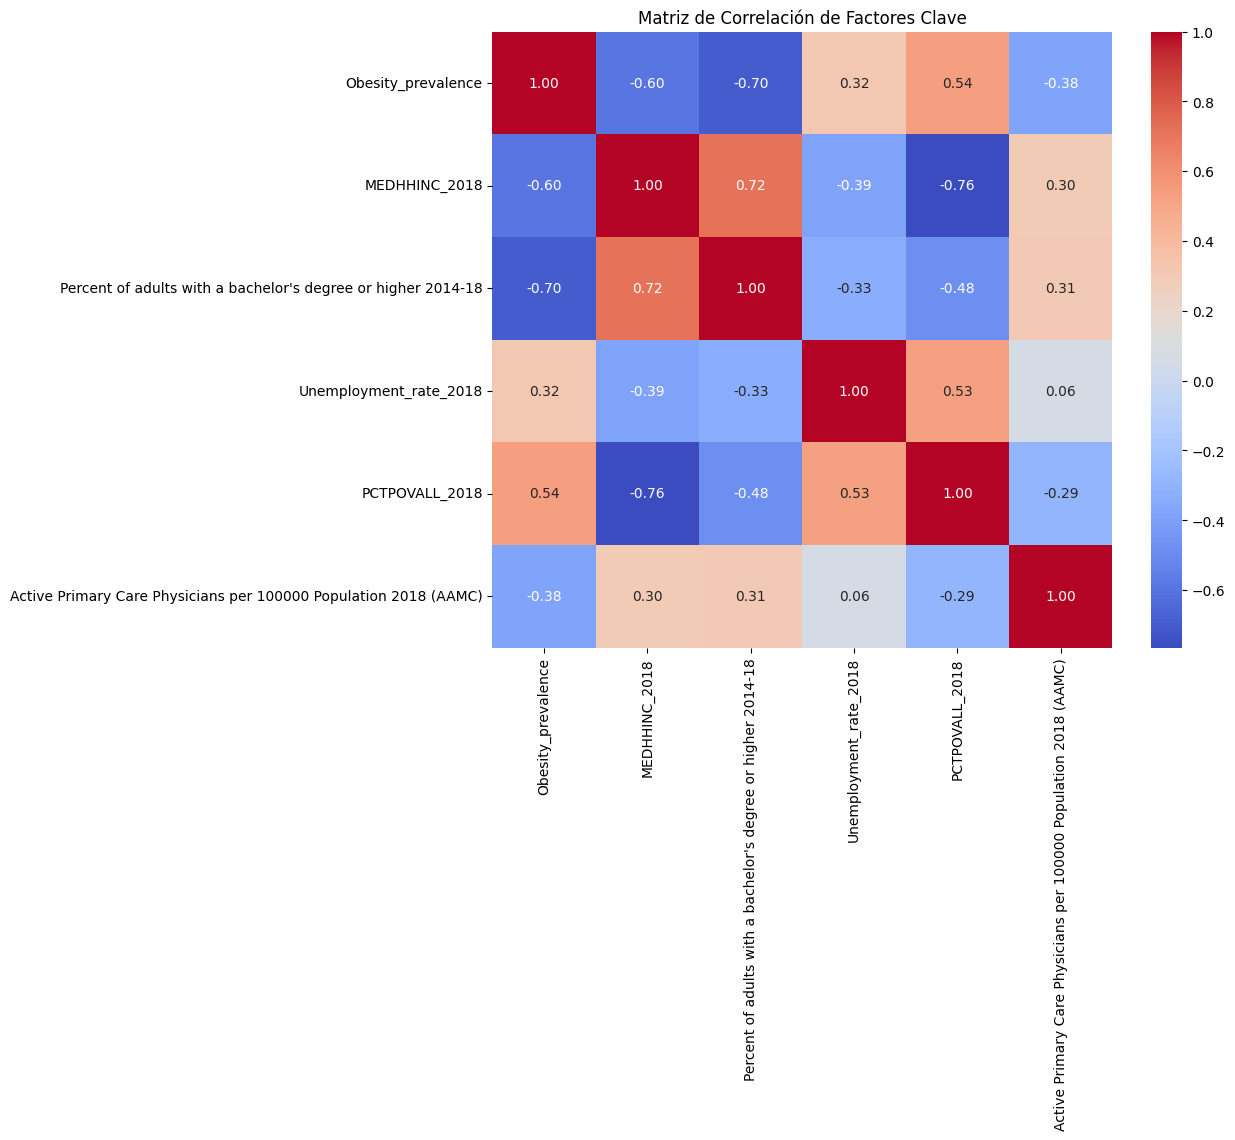

In [61]:
# # Visualización del Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Factores Clave')
plt.show()



Una vez calculada la correlación podemos dibujar el `pairplot` (es un paso opcional):

/tmp/ipython-input-924717944.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/tmp/ipython-input-924717944.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


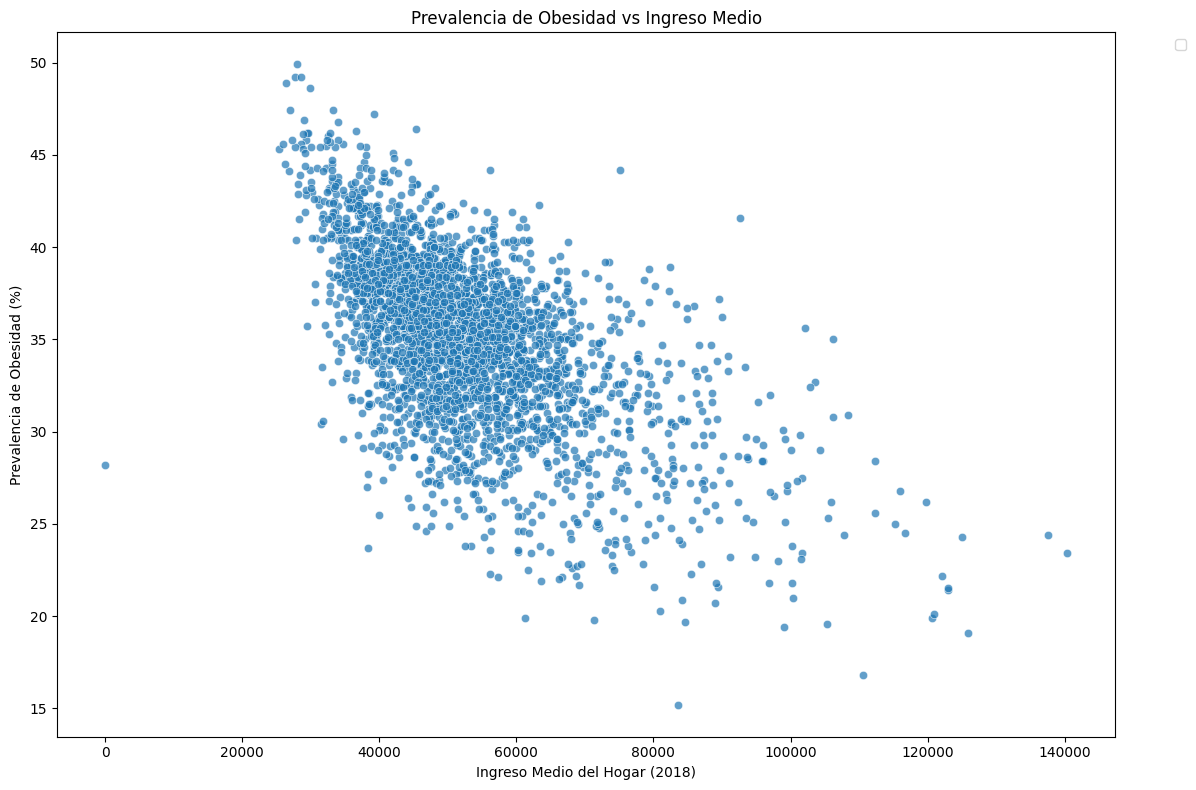

In [62]:
# Visualización de Dispersión (Scatter Plot)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=total_data,
    x='MEDHHINC_2018',
    y='Obesity_prevalence',
    palette='Set1',
    alpha=0.7
)
plt.title('Prevalencia de Obesidad vs Ingreso Medio')
plt.xlabel('Ingreso Medio del Hogar (2018)')
plt.ylabel('Prevalencia de Obesidad (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [63]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 6 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Obesity_prevalence                                                3140 non-null   float64
 1   MEDHHINC_2018                                                     3140 non-null   int64  
 2   Percent of adults with a bachelor's degree or higher 2014-18      3140 non-null   float64
 3   Unemployment_rate_2018                                            3140 non-null   float64
 4   PCTPOVALL_2018                                                    3140 non-null   float64
 5   Active Primary Care Physicians per 100000 Population 2018 (AAMC)  3140 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 147.3 KB


In [64]:
total_data.isnull().sum().sort_values(ascending=False)

,0
Obesity_prevalence,0
MEDHHINC_2018,0
Percent of adults with a bachelor's degree or higher 2014-18,0
Unemployment_rate_2018,0
PCTPOVALL_2018,0
Active Primary Care Physicians per 100000 Population 2018 (AAMC),0


De esta forma podemos simplificar el número de variables y trazar nuevas relaciones con la clase predictora.

#### Escalado de valores

El **escalado de valores** (*feature scaling*) es un paso crucial en el preprocesamiento de datos para muchos algoritmos de Machine Learning. Es una técnica que cambia el rango de los valores de los datos para que puedan ser comparables entre sí. El escalado normalmente implica la normalización, que es el proceso de cambiar los valores para que tengan una media de 0 y una desviación estándar de 1. Otra técnica común es el escalado mínimo-máximo, que transforma los datos para que todos los valores estén entre 0 y 1.

Antes de escalar los valores, debemos asegurarnos de que todas nuestras variables predictoras sean numéricas. Una vez preparadas, podemos aplicar técnicas como la normalización o el escalado Min-Max directamente sobre el dataset completo. Más adelante, cuando pasemos a la fase de modelado, será el momento de dividir los datos en entrenamiento y prueba.

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_variables = total_data[col_a_utilizar].select_dtypes(include='number').columns

X = total_data[num_variables.drop('Obesity_prevalence')]

# Normalización
scaler_norm = StandardScaler()
X_norm = pd.DataFrame(scaler_norm.fit_transform(X), index=total_data.index, columns=X.columns)

# Min-Max
scaler_minmax = MinMaxScaler()
X_minmax = pd.DataFrame(scaler_minmax.fit_transform(X), index=total_data.index, columns=X.columns)

X_norm.head(), X_minmax.head()

NameError: name 'total_data' is not defined

In [ ]:
X_test_sel.head()

In [ ]:
X_train_sel["Survived"] = list(y_train)
X_test_sel["Survived"] = list(y_test)

In [ ]:
X_train_sel.to_csv("/workspaces/machine-learning-content/assets/clean_titanic_train.csv", index=False)
X_test_sel.to_csv("/workspaces/machine-learning-content/assets/clean_titanic_test.csv", index=False)

La selección de características, al igual que el entrenamiento del modelo en general, se debe realizar solo en el conjunto de datos de entrenamiento y no en la totalidad. Si la llevásemos a cabo en todo el conjunto, podríamos introducir un sesgo que se conoce como **contaminación de datos** (*data leakage*), que ocurre cuando la información del conjunto de prueba se utiliza para tomar decisiones durante el entrenamiento, lo que puede llevar a una estimación demasiado optimista del rendimiento del modelo.

Por eso, la mejor práctica es dividir los datos en dos conjuntos: de entrenamiento y de prueba antes de la selección de características, que se realizará solo con los datos de entrenamiento y que luego se aplicará a ambos. De esta manera, aseguramos que este proceso y el modelo están siendo validados de manera justa.


Ahora ya conocemos cómo llevar a cabo un estudio profundo y en detalle para conocer completamente nuestro conjunto de datos. Recordemos los pasos que tenemos que seguir para llevarlo a cabo:

- Paso 1: Planteamiento del problema y recopilación de datos
- Paso 2: Exploración y limpieza de datos
- Paso 3: Análisis de variables univariante
- Paso 4: Análisis de variables multivariante
- Paso 5: Ingeniería de características
- Paso 6: Selección de características

Tras la implementación y adopción de estos pasos, estaremos preparados para entrenar el modelo.